Procesamiento en Streaming de un Modelo de ML con Spark Streaming y MLlib

In [0]:
from pyspark.ml import Pipeline
from pyspark.sql.types import StructType,StructField,LongType, StringType,DoubleType,TimestampType
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [0]:
%fs
ls

path name size modificationTime dbfs:/FileStore/ FileStore/ 0 0 dbfs:/databricks-datasets/ databricks-datasets/ 0 0 dbfs:/databricks-results/ databricks-results/ 0 0 dbfs:/user/ user/ 0 0

In [0]:
lines = sc.textFile("dbfs:/FileStore/tables/encuesta_aerolinea_simplificado-1.csv")
df = spark.read.format("csv").option("inferSchema", "true").option("header", "true").load("dbfs:/FileStore/tables/encuesta_aerolinea_simplificado.csv")
df.display()

_c0 id Gender Customer Type Age Type of Travel Class Flight Distance Inflight wifi service Departure/Arrival time convenient Ease of Online booking Gate location Food and drink Online boarding Seat comfort Inflight entertainment On-board service Leg room service Baggage handling Checkin service Inflight service Cleanliness Departure Delay in Minutes Arrival Delay in Minutes satisfaction 0 70172 Male Loyal Customer 13 Personal Travel Eco Plus 460 3 4 3 1 5 3 5 5 4 3 4 4 5 5 25 18 neutral or dissatisfied 1 5047 Male disloyal Customer 25 Business travel Business 235 3 2 3 3 1 3 1 1 1 5 3 1 4 1 1 6 neutral or dissatisfied 2 110028 Female Loyal Customer 26 Business travel Business 1142 2 2 2 2 5 5 5 5 4 3 4 4 4 5 0 0 satisfied 3 24026 Female Loyal Customer 25 Business travel Business 562 2 5 5 5 2 2 2 2 2 5 3 1 4 2 11 9 neutral or dissatisfied 4 119299 Male Loyal Customer 61 Business travel Business 214 3 3 3 3 4 5 5 3 3 4 4 3 3 3 0 0 satisfied 5 111157 Female Loyal Customer 26 Personal Travel Eco 1180 3 4 2 1 1 2 1 1 3 4 4 4 4 1 0 0 neutral or dissatisfied 6 82113 Male Loyal Customer 47 Personal Travel Eco 1276 2 4 2 3 2 2 2 2 3 3 4 3 5 2 9 23 neutral or dissatisfied 7 96462 Female Loyal Customer 52 Business travel Business 2035 4 3 4 4 5 5 5 5 5 5 5 4 5 4 4 0 satisfied 8 79485 Female Loyal Customer 41 Business travel Business 853 1 2 2 2 4 3 3 1 1 2 1 4 1 2 0 0 neutral or dissatisfied 9 65725 Male disloyal Customer 20 Business travel Eco 1061 3 3 3 4 2 3 3 2 2 3 4 4 3 2 0 0 neutral or dissatisfied 10 34991 Female disloyal Customer 24 Business travel Eco 1182 4 5 5 4 2 5 2 2 3 3 5 3 5 2 0 0 neutral or dissatisfied 11 51412 Female Loyal Customer 12 Personal Travel Eco Plus 308 2 4 2 2 1 2 1 1 1 2 5 5 5 1 0 0 neutral or dissatisfied 12 98628 Male Loyal Customer 53 Business travel Eco 834 1 4 4 4 1 1 1 1 1 1 3 4 4 1 28 8 neutral or dissatisfied 13 83502 Male Loyal Customer 33 Personal Travel Eco 946 4 2 4 3 4 4 4 4 4 5 2 2 2 4 0 0 satisfied 14 95789 Female Loyal Customer 26 Personal Travel Eco 453 3 2 3 2 2 3 2 2 4 3 2 2 1 2 43 35 neutral or dissatisfied 15 100580 Male disloyal Customer 13 Business travel Eco 486 2 1 2 3 4 2 1 4 2 1 4 1 3 4 1 0 neutral or dissatisfied 16 71142 Female Loyal Customer 26 Business travel Business 2123 3 3 3 3 4 4 4 4 5 3 4 5 4 4 49 51 satisfied 17 127461 Male Loyal Customer 41 Business travel Business 2075 4 4 2 4 4 4 4 5 5 5 5 3 5 5 0 10 satisfied 18 70354 Female Loyal Customer 45 Business travel Business 2486 4 4 4 4 3 4 5 5 5 5 5 3 5 4 7 5 satisfied 19 66246 Male Loyal Customer 38 Personal Travel Eco 460 2 3 3 2 5 3 5 5 1 2 4 3 2 5 17 18 neutral or dissatisfied 20 39076 Male Loyal Customer 9 Business travel Eco 1174 2 4 2 4 2 2 1 2 1 5 3 4 3 2 0 4 neutral or dissatisfied 21 22434 Female Loyal Customer 17 Personal Travel Eco 208 3 1 3 3 5 3 5 5 2 5 3 3 4 5 0 0 neutral or dissatisfied 22 43510 Female Loyal Customer 43 Personal Travel Eco 752 3 5 3 5 5 4 5 3 3 3 5 3 3 4 52 29 neutral or dissatisfied 23 114090 Female Loyal Customer 58 Personal Travel Eco 2139 4 5 4 5 4 3 4 4 4 4 4 2 4 2 0 0 neutral or dissatisfied 24 105420 Female disloyal Customer 23 Business travel Eco 452 5 0 5 1 1 5 1 1 4 5 5 3 5 1 54 44 satisfied 25 102956 Male Loyal Customer 57 Personal Travel Eco 719 4 4 4 1 5 4 5 5 3 2 4 4 5 5 27 28 neutral or dissatisfied 26 18510 Female Loyal Customer 33 Business travel Business 1561 1 1 1 1 1 5 3 4 4 4 3 5 4 2 0 0 satisfied 27 14925 Female Loyal Customer 49 Business travel Eco Plus 315 4 4 4 4 2 2 1 4 4 4 4 2 4 2 0 8 satisfied 28 118319 Female Loyal Customer 36 Business travel Business 3347 3 1 1 1 1 2 1 3 3 3 3 2 3 2 18 12 neutral or dissatisfied 29 75460 Male Loyal Customer 22 Personal Travel Eco 2342 3 2 3 3 3 3 1 3 2 4 3 4 2 3 19 0 neutral or dissatisfied 30 48492 Female Loyal Customer 31 Business travel Business 819 4 4 4 4 5 5 5 5 5 4 3 1 5 5 0 0 satisfied 31 27809 Female disloyal Customer 15 Business travel Eco 1043 2 2 2 3 5 2 5 5 3 1 4 2 4 5 3 0 neutral or dissatisfied 32 70594 Female 

In [0]:
df.columns

Out[63]: ['_c0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [0]:
from pyspark.sql.functions import when

df_transf = df.withColumn("satisfaction_binary", when(col("satisfaction") == "satisfied", 1).otherwise(0))

In [0]:
df_transf.columns

Out[65]: ['_c0',
 'id',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction',
 'satisfaction_binary']

In [0]:
# Extracción de las columnas requeridas en un nuevo DataFrame
valid_columns = df_transf.select(["Gender", "Age", "Inflight wifi service",  "Departure/Arrival time convenient", 
                           "Ease of Online booking", "Gate location", "Food and drink", "Online boarding",
                           "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "satisfaction_binary"])

In [0]:
# Limpiar el Dataframe eliminando los NaN
df_good = valid_columns.na.drop()

In [0]:
df_good.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- satisfaction_binary: integer (nullable = false)



In [0]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
# Convertir columnas categóricas utilizando StringIndexer y OneHotEncoder
gender_indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
gender_encoder = OneHotEncoder(inputCol="GenderIndex", outputCol="GenderOneHot")

In [0]:
# Generar el vector con las features para el entrenamiento del modelo con VectorAssembler()
assembler = VectorAssembler(inputCols=["GenderOneHot", "Age", "Inflight wifi service",  "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness"], outputCol="features")

In [0]:
# Construir el objeto LogisticRegression pasando los parámetros para featuresCol y labelCol.
lr_df_final = LogisticRegression(featuresCol='features',labelCol='satisfaction_binary')

In [0]:
# Construir el objeto Pipeline con los diferentes pasos de transformación.
pipeline = Pipeline(stages=[gender_indexer, gender_encoder, assembler, lr_df_final])

In [0]:
# Separa el conjunto de datos en conjuntos de entrenamiento y evaluación
train_data, test_data = df_good.randomSplit([0.8,.2])

In [0]:
# Entrenamos el modelo con el método fit() del Pipeline
fit_model = pipeline.fit(train_data)

In [0]:
results = fit_model.transform(test_data)

In [0]:
# Construimos el objeto BinaryClassificationEvaluator()
eval_df = BinaryClassificationEvaluator(labelCol="satisfaction_binary", rawPredictionCol="rawPrediction", metricName="areaUnderROC" )

In [0]:
# Evaluar la precisión (accuracy) del modelo
area_under_roc = eval_df.evaluate(results)
area_under_roc

Out[78]: 0.8753038994310638

In [0]:
# Utilizar la libreria handyspark para obtener el gráfico de ROC (opcional)

In [0]:
!pip install handyspark

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-d2262098-a47c-4708-bad6-b8501b372070/bin/python -m pip install --upgrade pip' command.


In [0]:
import handyspark
from handyspark import *

In [0]:
bcm = BinaryClassificationMetrics(results, scoreCol="probability", labelCol="satisfaction_binary")

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Out[83]: <AxesSubplot:title={'center':'Receiver Operating Characteristic Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

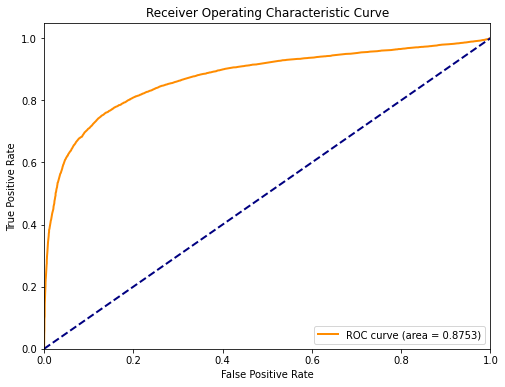

In [0]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
bcm.plot_roc_curve(ax=axs)

In [0]:
testData = test_data.repartition(20)
dbutils.fs.rm("dbfs:/FileStore/tables/proyecto/streaming/", True)
testData.write.format("CSV").option("header", True).save("dbfs:/FileStore/tables/proyecto/streaming/")


In [0]:
test_data.printSchema()

root
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Inflight wifi service: integer (nullable = true)
 |-- Departure/Arrival time convenient: integer (nullable = true)
 |-- Ease of Online booking: integer (nullable = true)
 |-- Gate location: integer (nullable = true)
 |-- Food and drink: integer (nullable = true)
 |-- Online boarding: integer (nullable = true)
 |-- Seat comfort: integer (nullable = true)
 |-- Inflight entertainment: integer (nullable = true)
 |-- On-board service: integer (nullable = true)
 |-- Leg room service: integer (nullable = true)
 |-- Baggage handling: integer (nullable = true)
 |-- Checkin service: integer (nullable = true)
 |-- Inflight service: integer (nullable = true)
 |-- Cleanliness: integer (nullable = true)
 |-- satisfaction_binary: integer (nullable = false)



In [0]:
schema = StructType([
    StructField("Gender", StringType(), nullable=True),
    StructField("Age", IntegerType(), nullable=True),
    StructField("Inflight wifi service", IntegerType(), nullable=True),
    StructField("Departure/Arrival time convenient", IntegerType(), nullable=True),
    StructField("Ease of Online booking", IntegerType(), nullable=True),
    StructField("Gate location", IntegerType(), nullable=True),
    StructField("Food and drink", IntegerType(), nullable=True),
    StructField("Online boarding", IntegerType(), nullable=True),
    StructField("Seat comfort", IntegerType(), nullable=True),
    StructField("Inflight entertainment", IntegerType(), nullable=True),
    StructField("On-board service", IntegerType(), nullable=True),
    StructField("Leg room service", IntegerType(), nullable=True),
    StructField("Baggage handling", IntegerType(), nullable=True),
    StructField("Checkin service", IntegerType(), nullable=True),
    StructField("Inflight service", IntegerType(), nullable=True),
    StructField("Cleanliness", IntegerType(), nullable=True),
    StructField("satisfaction_binary", IntegerType(), nullable=False)
])


In [0]:
# Creamos la fuente de datos del stream
sourceStream=spark.readStream.format("csv").option("header",True).schema(schema).option("ignoreLeadingWhiteSpace",True).option("mode","dropMalformed").option("maxFilesPerTrigger",1).load("dbfs:/FileStore/tables/proyecto/streaming/").withColumnRenamed("output","label")

In [0]:
# Aplicamos "transform" a la fuente a partir del modelo
streaming = fit_model.transform(sourceStream).select('satisfaction_binary', 'probability', 'prediction')
display(streaming)

satisfaction_binary probability prediction 1 Map(vectorType -> dense, length -> 2, values -> List(0.2424075345703789, 0.7575924654296211)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.31375600355045624, 0.6862439964495437)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.568572041322856, 0.431427958677144)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.9903846624885844, 0.009615337511415634)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.41639115363536283, 0.5836088463646372)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.05826866138156823, 0.9417313386184317)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8466878729437872, 0.15331212705621278)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8066417420037786, 0.19335825799622142)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.779047313467594, 0.22095268653240596)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6725038965220913, 0.3274961034779087)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.9919769699313185, 0.008023030068681547)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.7131629874841516, 0.28683701251584837)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.31497903837278973, 0.6850209616272103)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.12442355540220439, 0.8755764445977956)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.6266136534061307, 0.37338634659386927)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.93075293486844, 0.06924706513155998)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.1436196320220602, 0.8563803679779398)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.40768556167228776, 0.5923144383277122)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.06836470220538157, 0.9316352977946184)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.1026293612087748, 0.8973706387912253)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.9896928915381359, 0.010307108461864112)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8679676224827401, 0.13203237751725994)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.19039465010578657, 0.8096053498942134)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.5979285326457823, 0.4020714673542177)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6979383199460231, 0.30206168005397693)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.30886425484232555, 0.6911357451576745)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6313976479038682, 0.3686023520961318)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.2644869946247122, 0.7355130053752879)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6330141010227132, 0.36698589897728684)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.4971546354449426, 0.5028453645550575)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8991244053196454, 0.10087559468035456)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.3469717491423625, 0.6530282508576375)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.09830035402816041, 0.9016996459718396)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.17156291977120552, 0.8284370802287945)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.5517346853893875, 0.4482653146106125)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8324679061888939, 0.16753209381110612)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.6458306608113471, 0.3541693391886529)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.7468082947792759, 0.2531917052207241)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.33150376301257356, 0.6684962369874264)) 1.0 0 Map(vectorType -> dense, length

In [0]:
# Hacemos una query adicional
query = (streaming.writeStream.outputMode("append").format("memory").queryName("additionalquery").start())

In [0]:
%sql
select * from additionalquery

satisfaction_binary probability prediction 1 Map(vectorType -> dense, length -> 2, values -> List(0.2424075345703789, 0.7575924654296211)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.31375600355045624, 0.6862439964495437)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.568572041322856, 0.431427958677144)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.9903846624885844, 0.009615337511415634)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.41639115363536283, 0.5836088463646372)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.05826866138156823, 0.9417313386184317)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8466878729437872, 0.15331212705621278)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8066417420037786, 0.19335825799622142)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.779047313467594, 0.22095268653240596)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6725038965220913, 0.3274961034779087)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.9919769699313185, 0.008023030068681547)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.7131629874841516, 0.28683701251584837)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.31497903837278973, 0.6850209616272103)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.12442355540220439, 0.8755764445977956)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.6266136534061307, 0.37338634659386927)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.93075293486844, 0.06924706513155998)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.1436196320220602, 0.8563803679779398)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.40768556167228776, 0.5923144383277122)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.06836470220538157, 0.9316352977946184)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.1026293612087748, 0.8973706387912253)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.9896928915381359, 0.010307108461864112)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8679676224827401, 0.13203237751725994)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.19039465010578657, 0.8096053498942134)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.5979285326457823, 0.4020714673542177)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6979383199460231, 0.30206168005397693)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.30886425484232555, 0.6911357451576745)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6313976479038682, 0.3686023520961318)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.2644869946247122, 0.7355130053752879)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.6330141010227132, 0.36698589897728684)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.4971546354449426, 0.5028453645550575)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8991244053196454, 0.10087559468035456)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.3469717491423625, 0.6530282508576375)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.09830035402816041, 0.9016996459718396)) 1.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.17156291977120552, 0.8284370802287945)) 1.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.5517346853893875, 0.4482653146106125)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.8324679061888939, 0.16753209381110612)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.6458306608113471, 0.3541693391886529)) 0.0 0 Map(vectorType -> dense, length -> 2, values -> List(0.7468082947792759, 0.2531917052207241)) 0.0 1 Map(vectorType -> dense, length -> 2, values -> List(0.33150376301257356, 0.6684962369874264)) 1.0 0 Map(vectorType -> dense, length

In [0]:
additionalquery_df = spark.sql("select * from additionalquery")

In [0]:
additionalquery_df.select(col("prediction"), col("satisfaction_binary")).where(col("satisfaction_binary") != col("prediction")).show(30, truncate=False)

+----------+-------------------+
|prediction|satisfaction_binary|
+----------+-------------------+
|1.0       |0                  |
|0.0       |1                  |
|1.0       |0                  |
|1.0       |0                  |
|0.0       |1                  |
|0.0       |1                  |
|1.0       |0                  |
|0.0       |1                  |
|1.0       |0                  |
|0.0       |1                  |
|1.0       |0                  |
|0.0       |1                  |
|1.0       |0                  |
|1.0       |0                  |
|0.0       |1                  |
|1.0       |0                  |
|1.0       |0                  |
|0.0       |1                  |
|0.0       |1                  |
|1.0       |0                  |
|0.0       |1                  |
|0.0       |1                  |
|0.0       |1                  |
|0.0       |1                  |
|0.0       |1                  |
|0.0       |1                  |
|1.0       |0                  |
|0.0      

Evaluamos el modelo en stream con un MulticlassClassificationEvaluator

In [0]:
df_evaluar = spark.sql("SELECT * FROM additionalquery")

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="satisfaction_binary", metricName="accuracy")


In [0]:
accuracy = evaluator.evaluate(df_evaluar)

Accuracy

In [0]:
print(f"Accuracy del modelo: {accuracy}")

Accuracy del modelo: 0.8159148895200501
